# Machine Learning Basics
In this tutorial we learn how to split data, transform data and apply regularization using logistic regression example.

# Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle
from tqdm.notebook import tqdm
from pathlib import Path

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression

In [2]:
# set width of Jupyter notebook
from IPython.core.display import HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

# set some visual properties of displaying pandas DataFrame
pd.options.display.max_columns=200
pd.options.display.max_rows=200

**Download the data if needed (and unpack it into the Data folder), we use the same dataset as in the python intro:** <a href="https://www2.karlin.mff.cuni.cz/~kozmikk/files/data_devsample.zip" target="_blank">credit risk data</a> 

# Load Data
- Data sample represents data used in financial institutions for development of credit risk scoring models.
- This data sample was used in Kaggle competition arranged by Home Credit Group in 2018.
- Data includes binary target variable `TARGET` and multiple regressors to be used in model.
- Column `SK_ID_CURR` is used as unique identifier of credit application and columns `TIME` represents time of the application.
- Model should predict solvency of applicants at the time of application for credit.

Original [Kaggle competition](https://www.kaggle.com/competitions/home-credit-default-risk/data)

In [3]:
# Load data - set index column, decimal point, separator
data_file = Path("../Data/data_devsample.csv")
data = pd.read_csv(data_file, sep = ',', decimal = '.', index_col = 'SK_ID_CURR')

# print time of data being loaded - use strftime
print(f'Data loaded on:   {datetime.datetime.now().strftime(format="%Y-%m-%d %H:%M:%S")}')

Data loaded on:   2024-04-17 11:46:03


In [4]:
data

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,MIN_AMTCR_0M_INFM,MAX_AMTCR_0M_INFM,MEAN_AMTCR_0M_INFM,MEDIAN_AMTCR_0M_INFM,STD_AMTCR_0M_INFM,MIN_AMTCR_0M_6M,MAX_AMTCR_0M_6M,MEAN_AMTCR_0M_6M,MEDIAN_AMTCR_0M_6M,STD_AMTCR_0M_6M,MIN_AMTCR_0M_INFM_TYPE_EQ_ACTIVE,MAX_AMTCR_0M_INFM_TYPE_EQ_ACTIVE,MEAN_AMTCR_0M_INFM_TYPE_EQ_ACTIVE,MEDIAN_AMTCR_0M_INFM_TYPE_EQ_ACTIVE,STD_AMTCR_0M_INFM_TYPE_EQ_ACTIVE,MIN_AMTCR_0M_6M_TYPE_EQ_ACTIVE,MAX_AMTCR_0M_6M_TYPE_EQ_ACTIVE,MEAN_AMTCR_0M_6M_TYPE_EQ_ACTIVE,MEDIAN_AMTCR_0M_6M_TYPE_EQ_ACTIVE,STD_AMTCR_0M_6M_TYPE_EQ_ACTIVE,MIN_AMTCR_0M_INFM_TYPE_EQ_CLOSED,MAX_AMTCR_0M_INFM_TYPE_EQ_CLOSED,MEAN_AMTCR_0M_INFM_TYPE_EQ_CLOSED,MEDIAN_AMTCR_0M_INFM_TYPE_EQ_CLOSED,STD_AMTCR_0M_INFM_TYPE_EQ_CLOSED,MIN_AMTCR_0M_6M_TYPE_EQ_CLOSED,MAX_AMTCR_0M_6M_TYPE_EQ_CLOSED,MEAN_AMTCR_0M_6M_TYPE_EQ_CLOSED,MEDIAN_AMTCR_0M_6M_TYPE_EQ_CLOSED,STD_AMTCR_0M_6M_TYPE_EQ_CLOSED,MIN_DPD_0M_INFM,MAX_DPD_0M_INFM,MEAN_DPD_0M_INFM,MEDIAN_DPD_0M_INFM,STD_DPD_0M_INFM,MIN_DPD_0M_6M,MAX_DPD_0M_6M,MEAN_DPD_0M_6M,MEDIAN_DPD_0M_6M,STD_DPD_0M_6M,MIN_DPD_0M_INFM_TYPE_EQ_ACTIVE,MAX_DPD_0M_INFM_TYPE_EQ_ACTIVE,MEAN_DPD_0M_INFM_TYPE_EQ_ACTIVE,MEDIAN_DPD_0M_INFM_TYPE_EQ_ACTIVE,STD_DPD_0M_INFM_TYPE_EQ_ACTIVE,MIN_DPD_0M_6M_TYPE_EQ_ACTIVE,MAX_DPD_0M_6M_TYPE_EQ_ACTIVE,MEAN_DPD_0M_6M_TYPE_EQ_ACTIVE,MEDIAN_DPD_0M_6M_TYPE_EQ_ACTIVE,STD_DPD_0M_6M_TYPE_EQ_ACTIVE,MIN_DPD_0M_INFM_TYPE_EQ_CLOSED,MAX_DPD_0M_INFM_TYPE_EQ_CLOSED,MEAN_DPD_0M_INFM_TYPE_EQ_CLOSED,MEDIAN_DPD_0M_INFM_TYPE_EQ_CLOSED,STD_DPD_0M_INFM_TYPE_EQ_CLOSED,MIN_DPD_0M_6M_TYPE_EQ_CLOSED,MAX_DPD_0M_6M_TYPE_EQ_CLOSED,MEAN_DPD_0M_6M_TYPE_EQ_CLOSED,MEDIAN_DPD_0M_6M_TYPE_EQ_CLOSED,STD_DPD_0M_6M_TYPE_EQ_CLOSED,MEAN_AMTCR_1M_3M_DIV_MEAN_AMTCR_3M_12M,MEAN_AMTCR_1M_3M_TYPE_EQ_ACTIVE_DIV_MEAN_AMTCR_3M_12M_TYPE_EQ_ACTIVE,MEAN_AMTCR_1M_3M_TYPE_EQ_CLOSED_DIV_MEAN_AMTCR_3M_12M_TYPE_EQ_CLOSED,MEAN_AMTCR_OVERDUE_0M_IN

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80000 entries, 215138 to 259380
Columns: 196 entries, TARGET to MONTH
dtypes: float64(139), int64(40), object(17)
memory usage: 120.2+ MB


In [6]:
# Print some numbers about data sample size
print(f'Number of rows:   {data.shape[0]:,}'.replace(',', ' '))
print(f'Number of unique indexes:   {data.index.nunique():,}'.replace(',', ' '))
print(f'Number of columns:   {data.shape[1]:,}'.replace(',', ' '))

Number of rows:   80 000
Number of unique indexes:   80 000
Number of columns:   196


## Metadata Definitions

In [7]:
# check values in column TARGET
data.TARGET.value_counts(dropna=False)

TARGET
0.0    73584
1.0     6416
Name: count, dtype: int64

In [8]:
#name of the target column
col_target = "TARGET"
#name of the time column
col_time = "TIME"

#name of the month column
col_month = "MONTH"
# #name of the day column
col_day = "DAY"

# Data Exploration

## Basic Exploration

In [9]:
description = data.describe(include='all').transpose()
pd.options.display.max_rows = 1000
display(description)
pd.options.display.max_rows = 200

C:\Users\ondra\Documents\Data science 2\data-science-2\.venv\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\ondra\Documents\Data science 2\data-science-2\.venv\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\ondra\Documents\Data science 2\data-science-2\.venv\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\ondra\Documents\Data science 2\data-science-2\.venv\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\ondra\Documents\Data science 2\data-science-2\.venv\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TARGET,80000.0,NaN,NaN,NaN,0.0802,0.271604,0.0,0.0,0.0,0.0,1.0
NAME_CONTRACT_TYPE,80000,2,Cash loans,72366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CODE_GENDER,80000,3,F,52488,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_CAR,80000,2,N,52682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_REALTY,80000,2,Y,55485,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,55035.0,NaN,NaN,NaN,0.324648,0.637932,0.0,0.0,0.0,0.0,12.0
AMT_INCOME_TOTAL,80000.0,NaN,NaN,NaN,168266.291631,109277.519376,26100.0,112500.0,148500.0,202500.0,13500000.0
AMT_CREDIT,80000.0,NaN,NaN,NaN,598241.905987,400205.111684,45000.0,270000.0,513531.0,808650.0,4050000.0
AMT_ANNUITY,79994.0,NaN,NaN,NaN,27115.320924,14471.545555,1980.0,16573.5,24939.0,34644.375,225000.0
AMT_GOODS_PRICE,79937.0,NaN,NaN,NaN,537606.227373,367400.604652,40500.0,238500.0,450000.0,679500.0,4050000.0


In [10]:
data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,MIN_AMTCR_0M_INFM,MAX_AMTCR_0M_INFM,MEAN_AMTCR_0M_INFM,MEDIAN_AMTCR_0M_INFM,STD_AMTCR_0M_INFM,MIN_AMTCR_0M_6M,MAX_AMTCR_0M_6M,MEAN_AMTCR_0M_6M,MEDIAN_AMTCR_0M_6M,STD_AMTCR_0M_6M,MIN_AMTCR_0M_INFM_TYPE_EQ_ACTIVE,MAX_AMTCR_0M_INFM_TYPE_EQ_ACTIVE,MEAN_AMTCR_0M_INFM_TYPE_EQ_ACTIVE,MEDIAN_AMTCR_0M_INFM_TYPE_EQ_ACTIVE,STD_AMTCR_0M_INFM_TYPE_EQ_ACTIVE,MIN_AMTCR_0M_6M_TYPE_EQ_ACTIVE,MAX_AMTCR_0M_6M_TYPE_EQ_ACTIVE,MEAN_AMTCR_0M_6M_TYPE_EQ_ACTIVE,MEDIAN_AMTCR_0M_6M_TYPE_EQ_ACTIVE,STD_AMTCR_0M_6M_TYPE_EQ_ACTIVE,MIN_AMTCR_0M_INFM_TYPE_EQ_CLOSED,MAX_AMTCR_0M_INFM_TYPE_EQ_CLOSED,MEAN_AMTCR_0M_INFM_TYPE_EQ_CLOSED,MEDIAN_AMTCR_0M_INFM_TYPE_EQ_CLOSED,STD_AMTCR_0M_INFM_TYPE_EQ_CLOSED,MIN_AMTCR_0M_6M_TYPE_EQ_CLOSED,MAX_AMTCR_0M_6M_TYPE_EQ_CLOSED,MEAN_AMTCR_0M_6M_TYPE_EQ_CLOSED,MEDIAN_AMTCR_0M_6M_TYPE_EQ_CLOSED,STD_AMTCR_0M_6M_TYPE_EQ_CLOSED,MIN_DPD_0M_INFM,MAX_DPD_0M_INFM,MEAN_DPD_0M_INFM,MEDIAN_DPD_0M_INFM,STD_DPD_0M_INFM,MIN_DPD_0M_6M,MAX_DPD_0M_6M,MEAN_DPD_0M_6M,MEDIAN_DPD_0M_6M,STD_DPD_0M_6M,MIN_DPD_0M_INFM_TYPE_EQ_ACTIVE,MAX_DPD_0M_INFM_TYPE_EQ_ACTIVE,MEAN_DPD_0M_INFM_TYPE_EQ_ACTIVE,MEDIAN_DPD_0M_INFM_TYPE_EQ_ACTIVE,STD_DPD_0M_INFM_TYPE_EQ_ACTIVE,MIN_DPD_0M_6M_TYPE_EQ_ACTIVE,MAX_DPD_0M_6M_TYPE_EQ_ACTIVE,MEAN_DPD_0M_6M_TYPE_EQ_ACTIVE,MEDIAN_DPD_0M_6M_TYPE_EQ_ACTIVE,STD_DPD_0M_6M_TYPE_EQ_ACTIVE,MIN_DPD_0M_INFM_TYPE_EQ_CLOSED,MAX_DPD_0M_INFM_TYPE_EQ_CLOSED,MEAN_DPD_0M_INFM_TYPE_EQ_CLOSED,MEDIAN_DPD_0M_INFM_TYPE_EQ_CLOSED,STD_DPD_0M_INFM_TYPE_EQ_CLOSED,MIN_DPD_0M_6M_TYPE_EQ_CLOSED,MAX_DPD_0M_6M_TYPE_EQ_CLOSED,MEAN_DPD_0M_6M_TYPE_EQ_CLOSED,MEDIAN_DPD_0M_6M_TYPE_EQ_CLOSED,STD_DPD_0M_6M_TYPE_EQ_CLOSED,MEAN_AMTCR_1M_3M_DIV_MEAN_AMTCR_3M_12M,MEAN_AMTCR_1M_3M_TYPE_EQ_ACTIVE_DIV_MEAN_AMTCR_3M_12M_TYPE_EQ_ACTIVE,MEAN_AMTCR_1M_3M_TYPE_EQ_CLOSED_DIV_MEAN_AMTCR_3M_12M_TYPE_EQ_CLOSED,MEAN_AMTCR_OVERDUE_0M_IN

In [11]:
# define list of predictors
cols = list(data.columns)

# define list of numerical predictors
cols_num = [col for col in cols if data[col].dtype != 'O']
# define list of categorical predictors
cols_cat = [col for col in cols if data[col].dtype == 'O']

print('Numerical predictors:')
print('---------------------')
print(data[cols_num].dtypes)
print()
print('Categorical predictors:')
print('-----------------------')
print(data[cols_cat].dtypes)

Numerical predictors:
---------------------
TARGET                                                                             float64
CNT_CHILDREN                                                                       float64
AMT_INCOME_TOTAL                                                                   float64
AMT_CREDIT                                                                         float64
AMT_ANNUITY                                                                        float64
AMT_GOODS_PRICE                                                                    float64
REGION_POPULATION_RELATIVE                                                         float64
DAYS_BIRTH                                                                         float64
DAYS_EMPLOYED                                                                        int64
DAYS_REGISTRATION                                                                  float64
DAYS_ID_PUBLISH                               

## Data Split
- splitting data into training sample, validation sample, test sample, out of time sample and historical out of time sample

### Without Stratification

In [13]:
data['sample'] = 'default'

# define 'hoot' and 'oot' sample
data.loc[data[col_month] <= 201801, 'sample'] = 'hoot'
data.loc[data[col_month] >= 201811, 'sample'] = 'oot'

# define intime mask
intime_mask = (data[col_month] > 201801) & (data[col_month] < 201811)
# use train_test_split to split the intime into train and rest (don't forget seed)
data_train, data_rest = train_test_split(data[intime_mask], test_size=0.4, random_state = 12)
data.loc[data_train.index, 'sample'] = 'train'
# use train_test_split to split the rest into valid and test (don't forget seed)
data_valid, data_test = train_test_split(data_rest, test_size=0.5, random_state = 12)
data.loc[data_valid.index, 'sample'] = 'valid'
data.loc[data_test.index, 'sample'] = 'test'

In [14]:
data['sample'].value_counts(dropna = False)

sample
train    35829
oot      13475
test     11944
valid    11943
hoot      6809
Name: count, dtype: int64

In [15]:
# define function to plot default rate in time for different samples
def default_rate_in_time_per_sample(dt, col_target, col_month, col_sample):
    # group by over month and sample
    dt_grp = dt.groupby([col_month, col_sample]).agg(
        def_rt = (col_target, 'mean')
    ).reset_index()
    
    # pivot sample values to columns
    dt_grp_pivot = dt_grp.pivot(index = col_month, columns = col_sample, values = 'def_rt')

    # plot default rate in time
    lines = plt.plot(range(len(dt_grp_pivot)), dt_grp_pivot, marker = 'o')
    plt.xticks(range(len(dt_grp_pivot)), dt_grp_pivot.index, rotation = 90)
    # set legend
    plt.legend(iter(lines), tuple(dt_grp_pivot.columns), loc='best', bbox_to_anchor=(1.05, 1))
    
    plt.ylim([0, 0.1])
    plt.ylabel('default rate', loc='top')
    plt.xlabel('month', loc='right')
    
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_color('gray')
    ax.spines['bottom'].set_color('gray')
    ax.tick_params(axis='y', colors='gray')
    ax.tick_params(axis='x', colors='gray') 
    
    plt.show()

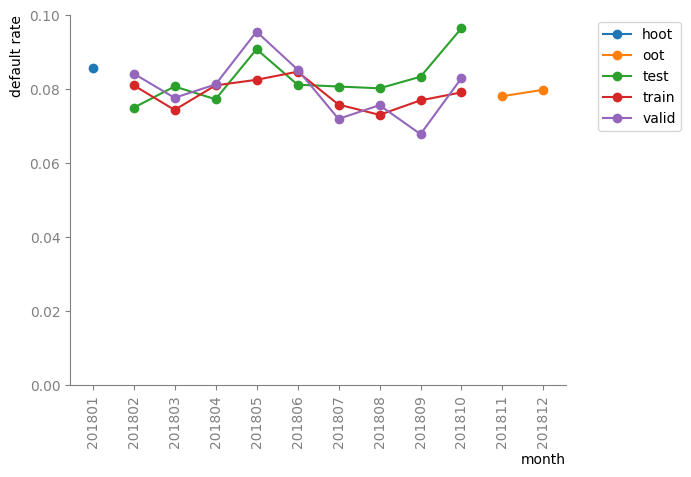

In [16]:
default_rate_in_time_per_sample(data, col_target, col_month, 'sample')

### With Stratification
- Stratification allows us to ensure that in each sample is approximately the same distribution in specified variables

In [17]:
data['sample'] = 'default'

# define 'hoot' and 'oot' sample
data.loc[data[col_month] <= 201801, 'sample'] = 'hoot'
data.loc[data[col_month] >= 201811, 'sample'] = 'oot'

# define intime mask
intime_mask = (data[col_month] > 201801) & (data[col_month] < 201811)
# use train_test_split to split the intime into train and rest (don't forget seed); use stratification
data_train, data_rest = train_test_split(data[intime_mask], test_size=0.4, random_state = 12, stratify = (data[intime_mask][[col_month, col_target]]))
data.loc[data_train.index, 'sample'] = 'train'
# use train_test_split to split the rest into valid and test (don't forget seed); use stratification
data_valid, data_test = train_test_split(data_rest, test_size=0.5, random_state = 12, stratify = (data_rest[[col_month, col_target]]))
data.loc[data_valid.index, 'sample'] = 'valid'
data.loc[data_test.index, 'sample'] = 'test'

In [18]:
data['sample'].value_counts(dropna = False)

sample
train    35829
oot      13475
test     11944
valid    11943
hoot      6809
Name: count, dtype: int64

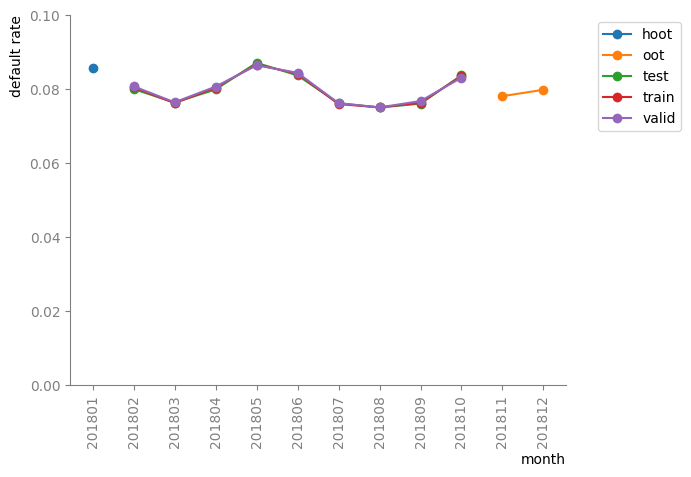

In [19]:
default_rate_in_time_per_sample(data, col_target, col_month, 'sample')

### Define sample masks

In [ ]:
# define sample masks
train_mask = (data['sample'] == 'train')
valid_mask = (data['sample'] == 'valid')
test_mask = (data['sample'] == 'test')
oot_mask = (data['sample'] == 'oot')
hoot_mask = (data['sample'] == 'hoot')

### Cross-Validation

We never want to evaluate performance on the training sample. We can use use all of the observations for both training and validation - using so-called k-fold cross-validation. We are not using it in this notebook, but it is a useful concept, very often used.

<img src="https://miro.medium.com/max/700/1*AAwIlHM8TpAVe4l2FihNUQ.png" width=500px style="float: center"/>

In [ ]:
kf = KFold(n_splits=5)
kf.get_n_splits(data)
print(kf)

In [ ]:
KFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in kf.split(data):
    print("TRAIN:", train_index, "TEST:", test_index)

## Data Cleaning

- We need to get rid of infinities, otherwise many numerical procedures fail

In [ ]:
# find columns with infinity values
cols_with_inf = []
for col in cols_num:
    if np.any(np.isinf(data[col])):
        cols_with_inf.append(col)
        print(f'Column {col} includes infinity values.')

# find columns with negative infinity values
cols_with_neginf = []
for col in cols_num:
    if np.any(np.isneginf(data[col])):
        cols_with_neginf.append(col)
        print(f'Column {col} includes negative infinity values.')

In [ ]:
# replace infinity values
for col in cols_with_inf:
    data[col] = data[col].replace(np.inf, 9999999)

## Univariate plots

In [ ]:
def plot_columns(columns, df):
    for col in columns:
        print('-' * 50)
        print('{}'.format(col.upper()))
        print('-' * 50)
        print('')
        k = int(df[col].nunique())
        
        
        if k < 2:
            print(f'{col} - only constant with value {df[col].unique()}')
        elif (k < 15) or (df[col].dtype == 'O'):
            info = '{:.2f}% is missing'.format(np.mean(df[col].isna()) * 100)
            print(info)
            
            ax = (df[col].value_counts(dropna=False).iloc[0:15] / df[col].shape[0]).plot.bar()
            _ = ax.set_title('\n' + col.replace('_', ' ').upper() + '\n')
            for p in ax.patches:
                width = p.get_width()
                height = p.get_height()
                x, y = p.get_xy() 
                _ = ax.annotate('{:.2f}%'.format(height * 100), (x + width/2, y + height + 0.02), ha='center')
                ax.spines['right'].set_visible(False)
                ax.spines['top'].set_visible(False)


            plt.show()
            
        else:
            info = '{:.2f}% above 0'.format(np.mean(np.where(df[col] > 0, 1, 0)) * 100)
            print(info)

            info = '{:.2f}% is missing'.format(np.mean(df[col].isna()) * 100)
            print(info)
            
            ax = df[col].hist(log=True)
            _ = ax.set_title('\n' + col.replace('_', ' ').upper() + '\n')
            plt.show()

            ax = df[col].hist(log=False)
            _ = ax.set_title('\n' + col.replace('_', ' ').upper() + '\n')
            plt.show()

                

    print('\n')

In [ ]:
plot_columns(data.columns, data)

### Check suspicious variable

In [ ]:
data[['FIRST_TRANSACTION_TIME_MONTHS', 'LAST_TRANSACTION_TIME_MONTHS']]

In [ ]:
(data['FIRST_TRANSACTION_TIME_MONTHS']>= data['LAST_TRANSACTION_TIME_MONTHS']).sum()

<span style="color:red">**TO DO:** Explore more, find more suspicious variables, try to understand the data! </span>

## Missing data

In [ ]:
# define function that plots share of null values in time for given predictor
def share_of_nulls(dt, col_month, predictor):
    if dt[predictor].isnull().sum() == 0:
        return
    dt2 = dt[[col_month, predictor]]
    
    dt2 = dt2.assign(is_null=dt2[predictor].isnull().astype(int).values)
    dt_grp = dt2.groupby(col_month).agg(
        share_of_nulls = ('is_null', 'mean')
    )
    
    plt.plot(range(len(dt_grp)), dt_grp['share_of_nulls'], marker = 'o')
    plt.xticks(range(len(dt_grp)), dt_grp.index, rotation = 90)
    plt.title(predictor)
    plt.xlabel('month', loc='right')
    plt.ylabel('null share', loc='top')
    plt.ylim([0,1])
    
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_color('gray')
    ax.spines['bottom'].set_color('gray')
    ax.tick_params(axis='y', colors='gray')
    ax.tick_params(axis='x', colors='gray')    
    
    plt.show()

In [ ]:
for pred in data.columns:
    share_of_nulls(data, col_month, pred)

## Related to target

In [ ]:
# define function that plots default rate in time
def default_rate_across_group(data, col_group, col_target, yright_lim = None):
    dt = data.copy()
    k = int(dt[col_group].nunique())
    
    if (k > 10) and dt[col_group].dtype != 'O':
        dt[col_group] = pd.qcut(dt[col_group], q=10, duplicates='drop')
    
    dt_grp = dt.groupby(col_group, observed=False).agg(
        tot_cnt = (col_target, len),
        default_rate = (col_target, 'mean')
    )
    print('-----------------------------------------------------------------------------------------------------------')
    
    
    ax1 = plt.subplot(111)
    ax1.bar(range(len(dt_grp)), dt_grp['tot_cnt'])
    ax1.set_title(col_group)
    ax1.set_xticks(range(len(dt_grp)))
    ax1.set_xticklabels(dt_grp.index, rotation = 90)
    ax1.set_xlabel(col_group)
    ax1.set_ylabel('count', loc='top')
    ax1.spines['right'].set_color('gray')
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_color('gray')
    ax1.spines['bottom'].set_color('gray')
    ax1.tick_params(axis='y', colors='gray')
    ax1.tick_params(axis='x', colors='gray')    
    
    ax2 = ax1.twinx()
    ax2.plot(range(len(dt_grp)), dt_grp['default_rate'], marker ='o', color = 'red')
    ax2.set_ylabel('default rate', loc='top', color='red')
    if yright_lim is not None:
        ax2.set_ylim(yright_lim)
    ax2.spines['right'].set_color('gray')
    ax2.spines['top'].set_visible(False)
    ax2.spines['left'].set_color('gray')
    ax2.spines['bottom'].set_color('gray')
    ax2.tick_params(axis='y', colors='gray')
    ax2.tick_params(axis='x', colors='gray')
    
    plt.show()

    print('-----------------------------------------------------------------------------------------------------------')
    print('\n' * 5)

In [ ]:
default_rate_across_group(data, col_month, col_target, yright_lim = [0, None])

In [ ]:
for col in cols_cat:
    default_rate_across_group(data, col, col_target, yright_lim = [0, None])

In [ ]:
for col in cols_num:
    if col=='TARGET':
        continue
    default_rate_across_group(data, col, col_target, yright_lim = [0, None])

## Select variables

<span style="color:red">**TO DO:** add more variables to the list in the next cell </span>

In [ ]:
dont_use_variables_as_predictors = [
    'TARGET'
    , 'MONTH'
    , 'TIME'
    , 'BASE'
    , 'DAY'
    , 'sample'
    , 'FIRST_TRANSACTION_TIME_MONTHS'
    , 'LAST_TRANSACTION_TIME_MONTHS'
    , 'CNT_CHILDREN'
]

cols_pred = cols.copy()
for variable in dont_use_variables_as_predictors:
    if variable in cols_pred:
        cols_pred.remove(variable)

In [ ]:
# define list of numerical predictors
cols_pred_num = [col for col in cols_pred if data[col].dtype != 'O']
# define list of categorical predictors
cols_pred_cat = [col for col in cols_pred if data[col].dtype == 'O']

print('Numerical predictors:')
print('---------------------')
print(data[cols_pred_num].dtypes)
print()
print('Categorical predictors:')
print('-----------------------')
print(data[cols_pred_cat].dtypes)

# Feature engineering

## Automatic Grouping

### Create bins
- Remember, now we must take into account only training set

In [ ]:
# define bins for grouping numerical predictors
def get_grouping(dt, predictor, n_bins = 7):
    return np.unique([round(b, 4) for b in dt[predictor].quantile([i / n_bins for i in range(n_bins+1)])])

In [ ]:
predictor_grouping = {}
for col in tqdm(cols_pred_num):
    predictor_grouping[col] = get_grouping(data[train_mask], col)

In [ ]:
predictor_grouping

### Apply grouping

In [ ]:
for col in tqdm(cols_pred_num):
    data[col] = pd.cut(data[col], bins=predictor_grouping[col])
    
    # add 'missing' as a new category
    data[col] = data[col].values.add_categories('missing')
    
    # replace nans with 'missing', so it is easier to handle
    data[col] = data[col].fillna('missing')
    
for col in tqdm(cols_pred_cat):
    data[col] = data[col].fillna('missing')
    

In [ ]:
data

## Encode Categorical Predictors
- Category encoding is defined by:
$$ CategoryEncoding = \frac{f_{categ}\cdot DR_{category} + \alpha \cdot DR}{f_{categ} + \alpha} $$
where $f_{categ}$ is frequency of category to be encoded, $DR_{category}$ default rate in this category and $DR$ is total default rate.

<span style="color:red">**TO DO:** Write mean_target_encoding function </span>

The function computes category encoding, you can just fill in this template to have an easier start:


    def mean_target_encoding(dt, predictor, target, alpha = 0.01):
        
        # compute total count and total default rate
        # groupby the category
        # compute category encoding
        
        # in the grouped dataframe, if there are some nan, just replace it with total default rate
        dt_grp['categ_encoding'] = dt_grp['categ_encoding'].fillna(total_dr)
        
        return dt_grp[['categ_encoding']].to_dict()['categ_encoding']

In [ ]:
def mean_target_encoding(dt, predictor, target, alpha = 0.01):
    pass

In [ ]:
total_dr = np.mean(data[train_mask][col_target])

for pred in tqdm(cols_pred.copy()):
    k = int(data[pred].nunique())
    
    if k <= 1:
        if pred in cols_pred:
            cols_pred.remove(pred)
            continue
            
    new_vals = mean_target_encoding(
            dt=data[train_mask], 
            predictor=pred, 
            target=col_target
        )

    dt_grp = data.groupby(pred, dropna=False, observed=False).agg(
            categ_dr = (col_target, 'mean'),
            categ_cnt = (col_target, len)
        )

    additional_values = set(data[data[pred].notnull()][pred].unique()) - set(new_vals.keys())
    for p in additional_values:
        new_vals[p] = total_dr

    data['MTE_' + pred] = data[pred].map(new_vals)

    if 'MTE_' + pred not in cols_pred:
        cols_pred.append('MTE_' + pred)

    if pred in cols_pred:
        cols_pred.remove(pred)

In [ ]:
data

In [ ]:
cols_pred

## Check_grouping_stability

In [ ]:
def predictor_stability(dt, predictor, col_target, col_month):
    try:
        dt_grp = dt.groupby([col_month, predictor], observed=False).agg(
            obs_cnt = (col_target, len),
            default_rate = (col_target, 'mean')
        )
        dt_grp.reset_index(inplace = True)

        dt_grp_pivot = dt_grp.pivot(index = col_month, columns = predictor, values = 'default_rate')

        fig, axs = plt.subplots(1, 2, figsize = (12,4))
        fig.suptitle(predictor)
        for col in dt_grp_pivot.columns:
            axs[0].plot(range(len(dt_grp_pivot)), dt_grp_pivot[col], label = f'{col:.4f}')

        axs[0].set_xticks(range(len(dt_grp_pivot)))
        axs[0].set_xticklabels(dt_grp_pivot.index, rotation = 90)
        axs[0].set_xlabel('month', loc='right')
        axs[0].set_ylabel('default_rate', loc='top')
        axs[0].spines['right'].set_visible(False)
        axs[0].spines['top'].set_visible(False)
        axs[0].spines['left'].set_color('gray')
        axs[0].spines['bottom'].set_color('gray')
        axs[0].tick_params(axis='y', colors='gray')
        axs[0].tick_params(axis='x', colors='gray') 
        axs[0].legend(loc = 'best')

        dt_grp_pivot = dt_grp.pivot(index = col_month, columns = predictor, values = 'obs_cnt')
        dt_grp_pivot['tot_cnt'] = dt_grp_pivot.sum(axis = 1)

        for col in dt_grp_pivot.columns:
            dt_grp_pivot[col] /= dt_grp_pivot['tot_cnt']
        del dt_grp_pivot['tot_cnt']

        for col in dt_grp_pivot.columns:
            axs[1].plot(range(len(dt_grp_pivot)), dt_grp_pivot[col], label = f'{col:.4f}')

        axs[1].set_xticks(range(len(dt_grp_pivot)))
        axs[1].set_xticklabels(dt_grp_pivot.index, rotation = 90)
        axs[1].set_xlabel('month', loc='right')
        axs[1].set_ylabel('frequency', loc='top')
        axs[1].spines['right'].set_visible(False)
        axs[1].spines['top'].set_visible(False)
        axs[1].spines['left'].set_color('gray')
        axs[1].spines['bottom'].set_color('gray')
        axs[1].tick_params(axis='y', colors='gray')
        axs[1].tick_params(axis='x', colors='gray') 
        axs[1].legend(loc = 'best')

        plt.show()
    except:
        print(f'Predictor {predictor} failed')

In [ ]:
for pred in cols_pred:
    predictor_stability(data, pred, col_target, col_month)

# Logistic Regression

In [ ]:
# fit logistic regression with all predictors
logreg = LogisticRegression(
    penalty = None,
    max_iter = 5000
)

logreg.fit(data[train_mask][cols_pred], data[train_mask][col_target])

In [ ]:
# print predictor coefficients (sorted by magnitude)
preds_coef = []
for pred, coef in zip(cols_pred, logreg.coef_[0]):
    preds_coef += [(pred, coef)]
    
sorted(preds_coef, key = lambda x: abs(x[1]), reverse = True)[0:15]

In [ ]:
# predict probability
data = data.assign(prediction = logreg.predict_proba(data[cols_pred])[:,1])

In [ ]:
# calculate gini for different samples
col_score = 'prediction'

gini_hoot  = 2 * roc_auc_score(data[hoot_mask][col_target],  data[hoot_mask] [col_score]) - 1
gini_train = 2 * roc_auc_score(data[train_mask][col_target], data[train_mask][col_score]) - 1
gini_valid = 2 * roc_auc_score(data[valid_mask][col_target], data[valid_mask][col_score]) - 1
gini_test  = 2 * roc_auc_score(data[test_mask][col_target],  data[test_mask] [col_score]) - 1
gini_oot   = 2 * roc_auc_score(data[oot_mask][col_target],   data[oot_mask]  [col_score]) - 1

print(f'hoot:    {gini_hoot:.4f}')
print(f'train:   {gini_train:.4f}')
print(f'valid:   {gini_valid:.4f}')
print(f'test:    {gini_test:.4f}')
print(f'oot:     {gini_oot:.4f}')

## Penalty

In [ ]:
coefs = []
consts = [0.001, 0.01, 0.1, 1.0, 10.0]
models = []
for c in consts:
    # fit logistic regression with all predictors and penalty
    logreg = LogisticRegression(
        penalty = 'l1'
        , C = c
        , solver = 'liblinear'
        , max_iter = 2000
    )

    logreg.fit(data[train_mask][cols_pred], data[train_mask][col_target])
    models.append(logreg)
    coefs.append(logreg.coef_[0])

In [ ]:
coefs

In [ ]:
fig = plt.figure(figsize = (10,6))

ax = plt.gca()

ax.plot(consts, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('Regularization constant')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of regularization constant');

In [ ]:
# select the model you like (or better, the best performing model)
logreg = models[3]

In [ ]:
# predict probability
data = data.assign(prediction = logreg.predict_proba(data[cols_pred])[:,1])

In [ ]:
# calculate gini for different samples
col_score = 'prediction'

gini_hoot  = 2 * roc_auc_score(data[hoot_mask][col_target],  data[hoot_mask] [col_score]) - 1
gini_train = 2 * roc_auc_score(data[train_mask][col_target], data[train_mask][col_score]) - 1
gini_valid = 2 * roc_auc_score(data[valid_mask][col_target], data[valid_mask][col_score]) - 1
gini_test  = 2 * roc_auc_score(data[test_mask][col_target],  data[test_mask] [col_score]) - 1
gini_oot   = 2 * roc_auc_score(data[oot_mask][col_target],   data[oot_mask]  [col_score]) - 1

print(f'hoot:    {gini_hoot:.4f}')
print(f'train:   {gini_train:.4f}')
print(f'valid:   {gini_valid:.4f}')
print(f'test:    {gini_test:.4f}')
print(f'oot:     {gini_oot:.4f}')

<span style="color:red">**TO DO:** Try using 'l2' and 'elasticnet' regularization with different setups, investigate the performace, which one would you select?</span>

In [ ]:
# select one of the model's prediction 
data['prediction_final'] = data['prediction']

# Performance Characteristics

## ROC curve

In [ ]:
data = data.assign(prediction_score = np.log(data['prediction_final'] / (1 - data['prediction_final'])))

In [ ]:
fpr_train, tpr_train, treshold_train = roc_curve(data[train_mask][col_target], data[train_mask]['prediction_score'])
fpr_valid, tpr_valid, treshold_valid = roc_curve(data[valid_mask][col_target], data[valid_mask]['prediction_score'])
fpr_test, tpr_test, treshold_test    = roc_curve(data[test_mask][col_target], data[test_mask]['prediction_score'])
fpr_oot, tpr_oot, treshold_oot       = roc_curve(data[oot_mask][col_target], data[oot_mask]['prediction_score'])
fpr_hoot, tpr_hoot, treshold_hoot    = roc_curve(data[hoot_mask][col_target], data[hoot_mask]['prediction_score'])

In [ ]:
fig = plt.figure(figsize = (6,6))
plt.plot(fpr_train, tpr_train, label = 'train')
plt.plot(fpr_valid, tpr_valid, label = 'valid')
plt.plot(fpr_test, tpr_test, label = 'test')
plt.plot(fpr_oot, tpr_oot, label = 'oot')
plt.plot(fpr_hoot, tpr_hoot, label = 'hoot')
plt.plot([0, 1], [0, 1], ls = '--', color = 'black')
plt.xlim([0,1])
plt.ylim([0,1])

ax = plt.gca()
ax.spines['right'].set_color('gray')
ax.spines['top'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.tick_params(axis='y', colors='gray')
ax.tick_params(axis='x', colors='gray') 
ax.legend(loc = 'best')

plt.xlabel('False positive rate', loc='right')
plt.ylabel('True positive rate', loc='top')
plt.title('Roceiver operating characteristic curve')

plt.legend(loc = 'lower right')
plt.show()

## Performance per Sample

In [ ]:
samples = data['sample'].unique()
gini_sample = []
for sample in samples:
    mask = data['sample'] == sample
    gini = 2 * roc_auc_score(data[mask][col_target], data[mask]['prediction_score']) - 1
    gini_sample += [(sample, gini)]
    
pd.DataFrame(gini_sample, columns = ['sample', 'gini']).set_index('sample')

## Gini in Time

In [ ]:
months = sorted(data[col_month].unique())
gini_in_time = pd.DataFrame(index = months)
for sample in data['sample'].unique():
    dt = data[data['sample'] == sample]
    months_sample = dt[col_month].unique()
    gini_sample_month = []
    for m in months_sample:
        mask = dt[col_month] == m
        gini = 2 * roc_auc_score(dt[mask][col_target], dt[mask]['prediction_score']) - 1
        gini_sample_month += [(m, gini)]
    gini_sample_month = pd.DataFrame(gini_sample_month, columns = [col_month, sample]).set_index(col_month)
    gini_in_time = gini_in_time.join(gini_sample_month, how = 'left')
gini_in_time

In [ ]:
fig = plt.figure(figsize=(7,5))

for sample in samples:
    plt.plot(range(len(gini_in_time)), gini_in_time[sample], label = sample, marker = 'o')

plt.legend(loc = 'best')
plt.xticks(range(len(gini_in_time)), gini_in_time.index, rotation = 45)
plt.ylim([0,0.6])
plt.ylabel('Gini', loc='top')
plt.xlabel('month', loc='right')
plt.title('Gini in time')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.tick_params(axis='y', colors='gray')
ax.tick_params(axis='x', colors='gray') 
ax.legend(loc = 'best')

plt.show()

# Score Distribution

In [ ]:
def plot_score_calibration(dt, col_score, col_target, n_bins = 25):
    min_score = dt[col_score].min() - 0.1
    max_score = dt[col_score].max() + 0.1
    
    bins = [round(min_score + i * (max_score - min_score) / n_bins, 2) for i in range(n_bins+1)]
    dt['score_bin'] = pd.cut(dt[col_score], bins = bins, include_lowest = True)
    
    dt_grp = dt.groupby('score_bin', observed=False).agg(
        bad_cnt = (col_target, 'sum'),
        tot_cnt = (col_target, len),
        def_rt = (col_target, 'mean'),
        avg_score = (col_score, 'mean')
    )
    dt_grp['good_cnt'] = dt_grp['tot_cnt'] - dt_grp['bad_cnt']
    dt_grp['bad_cnt_norm'] = dt_grp['bad_cnt'] / dt_grp['tot_cnt']
    dt_grp['good_cnt_norm'] = dt_grp['good_cnt'] / dt_grp['tot_cnt']
    dt_grp['expected_pd'] = 1 / (1 + np.exp(-dt_grp['avg_score']))
    
    fig, axs = plt.subplots(1,2, figsize = (12,4))
    fig.suptitle(col_score)
    plt.subplots_adjust(wspace = 0.4)
    axs[0].bar(range(len(dt_grp)), dt_grp['bad_cnt'], color = 'salmon', label = 'bads')
    axs[0].bar(range(len(dt_grp)), dt_grp['good_cnt'], bottom = dt_grp['bad_cnt'], color = 'lightblue', label = 'goods')
    axs[0].set_ylabel('observations count', loc='top')
    axs[0].set_xlabel('score', loc='right')
    axs[0].set_xticks(range(len(dt_grp)))
    axs[0].set_xticklabels(dt_grp.index, rotation = 90)
    
    axs[0].spines['right'].set_color('gray')
    axs[0].spines['top'].set_visible(False)
    axs[0].spines['left'].set_color('gray')
    axs[0].spines['bottom'].set_color('gray')
    axs[0].tick_params(axis='y', colors='gray')
    axs[0].tick_params(axis='x', colors='gray') 
    
    ax0l = axs[0].twinx()
    ax0l.plot(range(len(dt_grp)), dt_grp['def_rt'], marker = 'o', color = 'red')
    ax0l.plot(range(len(dt_grp)), dt_grp['expected_pd'], color = 'black', ls = '--')
    ax0l.set_ylabel('default rate', color = 'red', loc='top')
    
    ax0l.spines['right'].set_color('gray')
    ax0l.spines['top'].set_visible(False)
    ax0l.spines['left'].set_color('gray')
    ax0l.spines['bottom'].set_color('gray')
    ax0l.tick_params(axis='y', colors='gray')
    ax0l.tick_params(axis='x', colors='gray') 
    
    axs[1].bar(range(len(dt_grp)), dt_grp['bad_cnt_norm'], color = 'salmon', label = 'bads')
    axs[1].bar(range(len(dt_grp)), dt_grp['good_cnt_norm'], bottom = dt_grp['bad_cnt_norm'].fillna(0), color = 'lightblue', label = 'goods')
    axs[1].set_ylabel('frequency',loc='top')
    axs[1].set_xlabel('score', loc='right')
    axs[1].set_xticks(range(len(dt_grp)))
    axs[1].set_xticklabels(dt_grp.index, rotation = 90)
    
    axs[1].spines['right'].set_visible(False)
    axs[1].spines['top'].set_visible(False)
    axs[1].spines['left'].set_color('gray')
    axs[1].spines['bottom'].set_color('gray')
    axs[1].tick_params(axis='y', colors='gray')
    axs[1].tick_params(axis='x', colors='gray')
    
    return dt_grp

In [ ]:
dt_grp = plot_score_calibration(data, 'prediction_score', col_target)

In [ ]:
# mean target encoding function

#def mean_target_encoding(dt, predictor, target, alpha = 0.01):
#     total_cnt = len(dt)
#     total_dr = np.mean(dt[target])
#     dt_grp = dt.groupby(predictor, dropna=False, observed=False).agg(
#         categ_dr = (target, 'mean'),
#         categ_cnt = (target, len)
#     )
#    
#     dt_grp['categ_freq'] = dt_grp['categ_cnt'] / total_cnt
#     dt_grp['categ_encoding'] = (dt_grp['categ_freq'] * dt_grp['categ_dr'] + alpha * total_dr) / (dt_grp['categ_freq'] + alpha)
#   
#     dt_grp['categ_encoding'] = dt_grp['categ_encoding'].fillna(total_dr)
#    
#     return dt_grp[['categ_encoding']].to_dict()['categ_encoding']